<font size="7">**PIV ley de pared**</font>

# Librerias

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as io
from scipy.stats import linregress as lr
import seaborn as sn
sn.set_style("whitegrid")
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.edgecolor'] = '#505b63'
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['axes.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
mpl.rcParams['axes.titlesize']=17
mpl.rcParams['figure.titlesize']=20
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams["legend.title_fontsize"]=15

# Cargo datos

In [14]:
n_samples = 58
n_x = 159
n_y = 253
U = np.zeros(n_y)
U2 = np.zeros(n_y)
V = np.zeros(n_y)
V2 = np.zeros(n_y)
Y = np.zeros(n_y)
UV = np.zeros(n_y)
c=0
for i in range(n_samples):
    data = io.loadmat('Resultado5/PIV ('+str((i+1))+').mat')
    U += data['U'].mean(axis=1)
    U2 += (data['U']**2).mean(axis=1)
    V += data['V'].mean(axis=1)
    V2 += (data['V']**2).mean(axis=1)
    UV += (data['V']*data['U']).mean(axis=1)
    Y += data['Y'].mean(axis=1)/1e6
    c+=1
U /= c
U2 /= c
V /= c
V2 /= c
UV /= c
Y /= c

# Ploteo de ruido

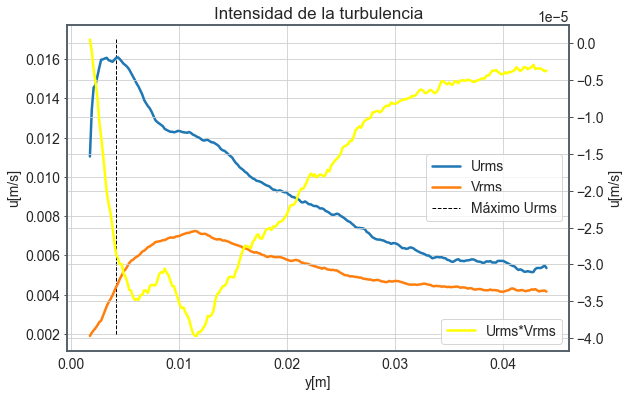

In [15]:
Ymax=0.0042
fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot()
ax1.plot(Y[8:], np.sqrt(U2-U**2)[8:], label='Urms')
ax1.plot(Y[8:], np.sqrt(V2-V**2)[8:], label='Vrms')
ax1.vlines(Ymax, 0.002, 0.017, color='black', linestyle='dashed', linewidth=1, label='Máximo Urms')
ax1.set_xlabel('y[m]')
ax1.set_ylabel('u[m/s]')
ax2 = ax1.twinx()
ax2.plot(Y[8:], (UV-U*V)[8:], color='yellow', label='Urms*Vrms')
plt.title('Intensidad de la turbulencia')
ax2.set_ylabel('u[m/s]')
ax1.legend(loc=5)
ax2.legend(loc=4)
plt.savefig('turbulencia.pdf', format='pdf')
plt.show()

# Ploteo datos crudos

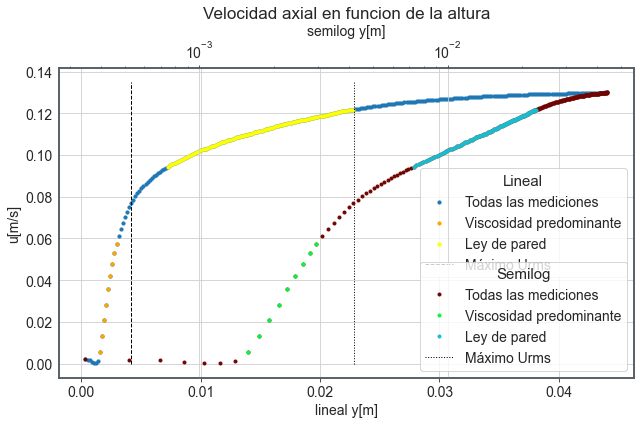

In [16]:
Yv = Y[7:16] #donde predominan los efectos viscosos
Uv = U[7:16] #same
Yw = Y[40:130] #ley de pared
Uw = U[40:130] #ley de pared

fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot(111)
ax1.scatter(Y, U, s=10, label='Todas las mediciones')
ax1.scatter(Yv, Uv, s=10, color='orange', label='Viscosidad predominante')
ax1.scatter(Yw, Uw, s=10,  color='yellow', label='Ley de pared')
ax1.vlines(Ymax, 0, 0.135, color='black', linestyle='dashed', linewidth=1, label='Máximo Urms')
ax1.set_xlabel('lineal y[m]')
ax1.set_ylabel('u[m/s]')
ax1.legend(title='Lineal', loc='center right')
ax2 = plt.twiny()
ax2.semilogx(Y, U, '.', color='#700400', label='Todas las mediciones')
ax2.semilogx(Yv, Uv, '.',  color='#00fc3b', label='Viscosidad predominante')
ax2.semilogx(Yw, Uw, '.', color='C9', label='Ley de pared')
ax2.vlines(Ymax, 0, 0.135, color='black', linestyle='dotted', linewidth=1, label='Máximo Urms')
ax2.set_xlabel('semilog y[m]')
ax2.set_ylabel('u[m/s]')
ax2.legend(title='Semilog', loc='lower right')
plt.title('Velocidad axial en funcion de la altura')
plt.tight_layout()
plt.savefig('Vel_axial.pdf', format='pdf')
plt.show()

# Obtencion de coeficientes

<font size="4">$u_\tau = \sqrt{\frac{\tau_w}{\rho}}$</font>

<font size="4">$y^+ = \frac{u_\tau y}{\nu}$</font>

<font size="4">$u^+ = \frac{u}{u_\tau}$</font>

<font size="4">$u = \frac{u_\tau}{k}ln(\frac{y}{y_0})$ o $u = u_\tau ln(\frac{y}{y_0})$</font>

<font size="4">$u^+ = \frac{1}{k}ln(y^+)$ + B</font>

<font size="5">Obtengo $y_0$ para correccion</font>

D:\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


Pendiente = 0.026218582175748125
Ordenada = 0.0
R = 0.9957971023542022
Error pendiente = 0.030189850510472942
 Error ordenada = 0.005871320874739463


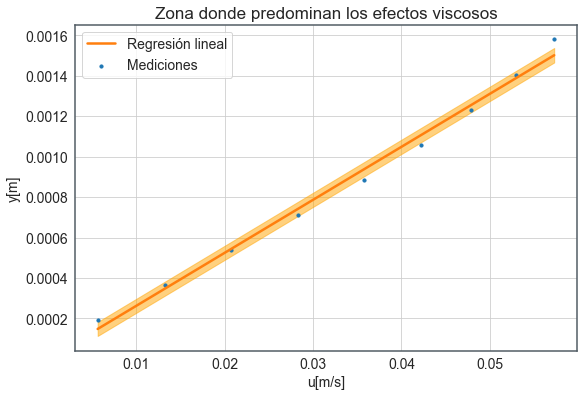

In [20]:
coefs_v = lr(Uv, Yv) #coeficientes del ajuste en la zona viscosa
aux1, cov_v = np.polyfit(Uv, Yv, 1, cov=True)
cov_v = np.sqrt(cov_v)
aj_v = np.polyval(aux1, Uv)
er_v = cov_v[0,0]*aj_v+cov_v[1,1]
print('Pendiente = {}\nOrdenada = {}\nR = {}\nError pendiente = {}\n Error ordenada = {}'.format(coefs_v.slope, coefs_v.intercept, coefs_v.rvalue, np.sqrt(cov_v[0,0]), np.sqrt(cov_v[1,1])))

fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot(111)
ax1.fill_between(Uv, aj_v+er_v, aj_v-er_v, color='orange', alpha=0.5)
ax1.scatter(Uv, Yv, label='Mediciones', s=10)
ax1.plot(Uv, Uv*coefs_v.slope+coefs_v.intercept, label='Regresión lineal', color='C1')
ax1.set_ylabel('y[m]')
ax1.set_xlabel('u[m/s]')
ax1.set_title('Zona donde predominan los efectos viscosos')
ax1.legend()
# ax2 = plt.subplot(122)
# ax2.semilogx(Uv, Yv, '.', label='Mediciones')
# ax2.plot(Uv, Uv*coefs_v.slope+coefs_v.intercept, label='Regresión lineal')
# ax2.set_xlabel('y[m]')
# ax2.set_ylabel('u[m/s]')
# ax2.set_title('Semilog x')
# ax2.legend()
# plt.suptitle('Velocidad axial en funcion de la altura, zona lineal')
plt.savefig('ajuste_lineal.pdf', format='pdf')
plt.show()

Y -= coefs_v.intercept
#Yv -= coefs_v.intercept
#Yw -= coefs_v.intercept

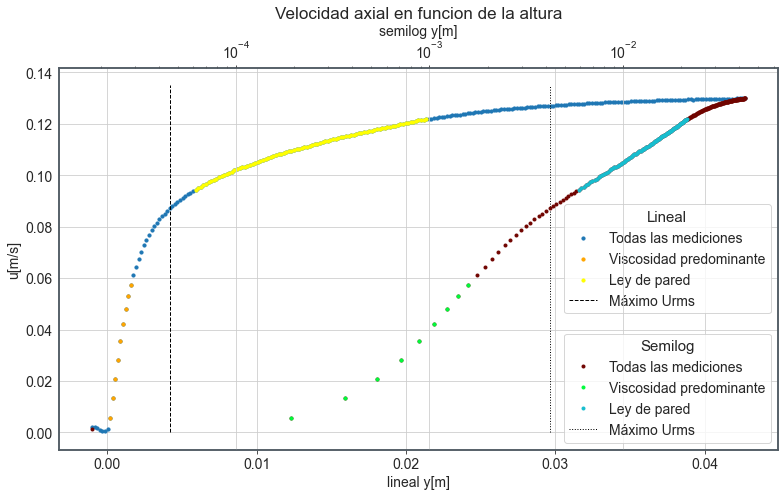

In [6]:
fig = plt.figure(figsize=(11,7))
ax1 = plt.subplot(111)
ax1.scatter(Y, U, s=10, label='Todas las mediciones')
ax1.scatter(Yv, Uv, s=10, color='orange', label='Viscosidad predominante')
ax1.scatter(Yw, Uw, s=10,  color='yellow', label='Ley de pared')
ax1.vlines(Ymax, 0, 0.135, color='black', linestyle='dashed', linewidth=1, label='Máximo Urms')
ax1.set_xlabel('lineal y[m]')
ax1.set_ylabel('u[m/s]')
ax1.legend(title='Lineal', loc='center right')
ax2 = plt.twiny()
ax2.semilogx(Y, U, '.', color='#700400', label='Todas las mediciones')
ax2.semilogx(Yv, Uv, '.',  color='#00fc3b', label='Viscosidad predominante')
ax2.semilogx(Yw, Uw, '.', color='C9', label='Ley de pared')
ax2.vlines(Ymax, 0, 0.135, color='black', linestyle='dotted', linewidth=1, label='Máximo Urms')
ax2.set_xlabel('semilog y[m]')
ax2.set_ylabel('u[m/s]')
ax2.legend(title='Semilog', loc='lower right')
plt.title('Velocidad axial en funcion de la altura')
plt.tight_layout()
plt.savefig('Vel_axial.pdf', format='pdf')
plt.show()

<font size="5">Obtengo $\frac{u_t}{k}$</font>

Pendiente = 0.02131638535241571
Ordenada = 0.20339559425105466
R = 0.9997145281889379


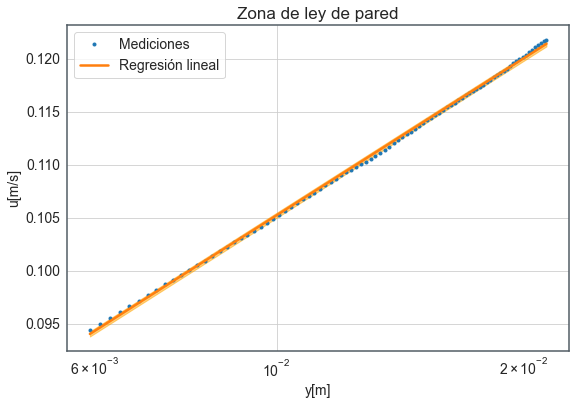

In [22]:
coefs_w = lr(np.log(Yw), Uw) #coeficientes donde vale la ley de pared
aux2, cov_w = np.polyfit(np.log(Yw), Uw, 1, cov=True)
cov_w = np.sqrt(cov_w)
aj_w = np.polyval(aux2, np.log(Yw))
er_w = cov_w[0,0]*aj_w+cov_w[1,1]
print('Pendiente = {}\nOrdenada = {}\nR = {}'.format(coefs_w.slope, coefs_w.intercept, coefs_w.rvalue))

fig = plt.figure(figsize=(9,6))
# ax1 = plt.subplot(121)
# ax1.scatter(Yw, Uw, label='Mediciones', s=10)
# ax1.plot(Yw, np.log(Yw)*coefs_w.slope+coefs_w.intercept, label='Regresión lineal', color='C1')
# ax1.set_xlabel('y[m]')
# ax1.set_ylabel('u[m/s]')
# ax1.set_title('Lineal')
# ax1.legend()
ax2 = plt.subplot(111)
ax2.fill_between(Yw, aj_w+er_w, aj_w-er_w, color='orange', alpha=0.5)
ax2.semilogx(Yw, Uw, '.', label='Mediciones')
ax2.semilogx(Yw, np.log(Yw)*coefs_w.slope+coefs_w.intercept, label='Regresión lineal')
ax2.set_xlabel('y[m]')
ax2.set_ylabel('u[m/s]')
ax2.set_title('Zona de ley de pared')
ax2.legend()
#plt.suptitle('Velocidad axial en funcion de la altura, zona ley de pared')
plt.savefig('Ajuste_lineal_wall_law.pdf', format='pdf')
plt.show()

Ut_k = coefs_w.slope
k = 0.41
Ut = Ut_k*k
y0 = np.exp(coefs_w.intercept/Ut_k)

In [8]:
Ut

0.00873971799449044

<font size="5">Obtengo $\nu$</font>

In [9]:
nu = Ut**2*coefs_v.slope
print('Coeficiente dinámico de viscosidad obtenido = {}'.format(nu))
print('Coeficiente dinámico de viscosidad según bibliografia a 20 grados = 1.003e-6')
print('Error en la viscosidad = {}'. format(np.sqrt((2*coefs_w.slope*coefs_v.slope*coefs_w.stderr)**2+(coefs_w.slope**2*coefs_v.stderr)**2)))

Coeficiente dinámico de viscosidad obtenido = 2.0026453265379968e-06
Coeficiente dinámico de viscosidad según bibliografia a 20 grados = 1.003e-6
Error en la viscosidad = 4.185670165380393e-07


<font size="5">Obtengo B</font>

In [10]:
coefs_B = lr(np.log(Yw*Ut/nu), Uw/Ut) #coeficientes donde vale la ley de pared, en este caso para obtener B
print('Pendiente = {}\nOrdenada(coef B) = {}\nR = {}'.format(coefs_B.slope, coefs_B.intercept, coefs_B.rvalue))
print('Error en B = {}'.format(coefs_B.stderr))

Pendiente = 2.4390243902439006
Ordenada(coef B) = 2.8306940557795084
R = 0.9997145281889372
Error en B = 0.006213902287593501


# Ploteo general

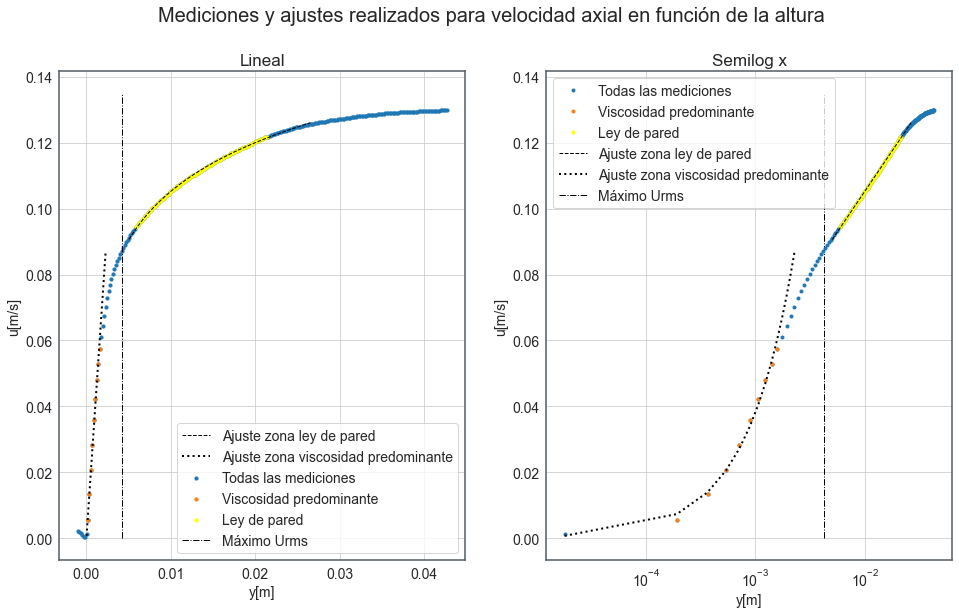

In [11]:
fig = plt.figure(figsize=(16,9))
ax1 = plt.subplot(121)
ax1.scatter(Y, U, s=10, label='Todas las mediciones')
ax1.scatter(Yv, Uv, s=10, label='Viscosidad predominante')
ax1.scatter(Yw, Uw, s=10,  color='yellow', label='Ley de pared')
ax1.plot(Y[35:160], np.log(Y[35:160])*coefs_w.slope+coefs_w.intercept, color='black', label='Ajuste zona ley de pared', linewidth=1, linestyle='dashed')
ax1.plot(Y[6:20], Y[6:20]/coefs_v.slope, color='black', label='Ajuste zona viscosidad predominante', linewidth=2, linestyle='dotted')
ax1.vlines(Ymax, 0, 0.135, color='black', linestyle='dashdot', linewidth=1, label='Máximo Urms')
ax1.set_xlabel('y[m]')
ax1.set_ylabel('u[m/s]')
ax1.set_title('Lineal')
ax1.legend()
ax2 = plt.subplot(122)
ax2.semilogx(Y, U, '.', label='Todas las mediciones')
ax2.semilogx(Yv, Uv, '.', label='Viscosidad predominante')
ax2.semilogx(Yw, Uw, '.', color='yellow', label='Ley de pared')
ax2.plot(Y[35:160], np.log(Y[35:160])*coefs_w.slope+coefs_w.intercept, color='black', label='Ajuste zona ley de pared', linewidth=1, linestyle='dashed')
ax2.plot(Y[6:20], Y[6:20]/coefs_v.slope, color='black', label='Ajuste zona viscosidad predominante', linewidth=2, linestyle='dotted')
ax2.vlines(Ymax, 0, 0.135, color='black', linestyle='dashdot', linewidth=1, label='Máximo Urms')
ax2.set_xlabel('y[m]')
ax2.set_ylabel('u[m/s]')
ax2.set_title('Semilog x')
ax2.legend()
plt.suptitle('Mediciones y ajustes realizados para velocidad axial en función de la altura')
plt.savefig('plot general.pdf', format='pdf')
plt.show()

In [12]:
coefs_w.intercept

0.20339559425105466